In [5]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import langid
import seaborn as sns



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install langid

^C


In [8]:
file_path = "E:/_TERM3/yelp_academic_dataset_review.json/yelp_academic_dataset_review.json"

data = []  # Create an empty list to store JSON data

with open(file_path, "r", encoding="utf-8") as file:
    for line in file:
        try:
            json_data = json.loads(line)
            data.append(json_data)  # Add JSON data to the list
        except json.JSONDecodeError as e:
            print(f"Error: JSONDecodeError - Error Message: {str(e)}")

# Convert JSON data to DataFrame
df_reviews = pd.DataFrame(data)

# Convert the "date" column to datetime data type
df_reviews["date"] = pd.to_datetime(df_reviews["date"], format="%Y-%m-%d %H:%M:%S", errors="coerce")


In [9]:
min_date = df_reviews["date"].min()
max_date = df_reviews["date"].max()

date_range_df = pd.DataFrame({"Min Date": [min_date], "Max Date": [max_date]})

print(date_range_df)
date_range_df.to_clipboard()


             Min Date            Max Date
0 2004-10-12 10:13:32 2018-11-14 18:13:26


In [10]:
# Reset row names
df_reviews.index = range(1, len(df_reviews) + 1)

In [11]:
# Select desired columns
keeps = ["date", "stars", "text", "business_id"]
reviews = df_reviews[keeps]

# Convert "stars" and "text" columns
reviews["stars"] = pd.to_numeric(reviews["stars"])
reviews["text"] = reviews["text"].astype(str)

# Print rows 16 to 17
print(reviews.iloc[15:17, :])

reviews.iloc[15:17, :].to_clipboard()


C:\Users\admin\AppData\Local\Temp\ipykernel_34652\3102668224.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews["stars"] = pd.to_numeric(reviews["stars"])
C:\Users\admin\AppData\Local\Temp\ipykernel_34652\3102668224.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews["text"] = reviews["text"].astype(str)


                  date  stars  \
16 2017-04-07 21:27:49    5.0   
17 2015-01-03 22:47:34    4.0   

                                                 text             business_id  
16  You can't really find anything wrong with this...  YvrylyuWgbP90RgMqZQVnQ  
17  Great lunch today. Staff was very helpful in a...  NyLYY8q1-H3hfsTwuwLPCg  


In [12]:
# Get the minimum and maximum values of the "date" field
min_date = reviews["date"].min()
max_date = reviews["date"].max()

print("Minimum date:", min_date)
print("Maximum date:", max_date)

Minimum date: 2004-10-12 10:13:32
Maximum date: 2018-11-14 18:13:26


In [13]:
#import the business dataset
file_business = "E:/_TERM3/yelp_academic_dataset_business.json/yelp_academic_dataset_business.json"

# Read the file with UTF-8 encoding
with open(file_business, "r", encoding="utf-8") as f:
    input_data2 = f.readlines()

# Convert JSON lines to DataFrame
business = pd.DataFrame([json.loads(line) for line in input_data2])

# Reset row names
business.index = range(1, len(business) + 1)

In [14]:
# Function to remove punctuation and title case city names
def clean_category(category):
    if category is not None:
        category = category.replace('Mexican, Restaurants','Restaurants, Mexican')
        category = category.replace('Pizza, Restaurants','Restaurants, Pizza')
        category = category.replace('Italian, Restaurants','Restaurants, Italian')
        category = category.replace('Chinese, Restaurants','Restaurants, Chinese')
        category = category.replace('Indian, Restaurants','Restaurants, Indian')
        category = category.replace('Thai, Restaurants','Restaurants, Thai')
        category = category.replace('Korean, Restaurants','Restaurants, Korean')
        category = category.replace('Japanese, Restaurants','Restaurants, Japanese')
        category = category.replace('Greek, Restaurants','Restaurants, Greek')
        category = category.replace('American (New), Restaurants','Restaurants, American (New)')
        category = category.replace('American (Traditional), Restaurants','Restaurants, American (Traditional)')
        category = category.replace('Seafood, Restaurants','Restaurants, Seafood')
        category = category.replace('Steakhouses, Restaurants','Restaurants, Steakhouses')
        category = category.replace('Vietnamese, Restaurants','Restaurants, Vietnamese')
        category = category.replace('Barbeque, Restaurants','Restaurants, Barbeque')
        category = category.replace('Burgers, Restaurants','Restaurants, Burgers')
        category = category.replace('Diners, Restaurants','Restaurants, Diners')
        category = category.replace('Sushi Bars, Restaurants','Restaurants, Sushi Bars')
        category = category.replace('Cajun/Creole, Seafood, Restaurants','Restaurants, Cajun/Creole, Seafood')
        category = category.replace('Breakfast & Brunch, Restaurants','Restaurants, Breakfast & Brunch')


        category = category.replace('Coffee & Tea, Food','Food, Coffee & Tea')
        category = category.replace('Grocery, Food','Food, Grocery')
        category = category.replace('Ice Cream & Frozen Yogurt, Food','Food, Ice Cream & Frozen Yogurt')


        category = category.replace('Beer, Wine & Spirits, Food','Food, Beer, Wine & Spirits')

        category = category.replace('Beauty & Spas, Barbers','Barbers, Beauty & Spas')
        category = category.replace('Beauty & Spas, Barbers','Barbers, Beauty & Spas')
        category = category.replace('Beauty & Spas, Hair Salons','Hair Salons, Beauty & Spas')

        category = category.replace('Auto Repair, Automotive','Automotive, Auto Repair')
        category = category.replace('Car Wash, Automotive','Automotive, Car Wash')

        category = category.replace('Pets, Veterinarians','Veterinarians, Pets')

        category = category.replace('Apartments, Real Estate, Home Services','Real Estate, Apartments, Home Services')
        category = category.replace('Real Estate, Home Services, Apartments','Real Estate, Apartments, Home Services')
        category = category.replace('Home Services, Real Estate, Apartments','Real Estate, Apartments, Home Services')
        category = category.replace('Home Services, Apartments, Real Estate','Real Estate, Apartments, Home Services')
        category = category.replace('Apartments, Home Services, Real Estate','Real Estate, Apartments, Home Services')

        category = category.replace('Banks & Credit Unions, Financial Services','Financial Services, Banks & Credit Unions')

        category = category.replace('Hotels, Event Planning & Services, Hotels & Travel','Hotels, Hotels & Travel, Event Planning & Services')
        category = category.replace('Hotels & Travel, Event Planning & Services, Hotels','Hotels, Hotels & Travel, Event Planning & Services')
        category = category.replace('Event Planning & Services, Hotels, Hotels & Travel','Hotels, Hotels & Travel, Event Planning & Services')
        category = category.replace('Event Planning & Services, Hotels & Travel, Hotels','Hotels, Hotels & Travel, Event Planning & Services')
        category = category.replace('Hotels & Travel, Hotels, Event Planning & Services','Hotels, Hotels & Travel, Event Planning & Services')

    return category.title() if category is not None else category

business['categories'] = business['categories'].apply(clean_category)
print(business[['categories']])



                                               categories
1                                       Golf, Active Life
2       Specialty Food, Restaurants, Dim Sum, Imported...
3                       Restaurants, Sushi Bars, Japanese
4                           Insurance, Financial Services
5       Plumbing, Shopping, Local Services, Home Servi...
...                                                   ...
192605  Water Purification Services, Water Heater Inst...
192606               Books, Mags, Music & Video, Shopping
192607  Home Services, Contractors, Landscaping, Mason...
192608                             Barbers, Beauty & Spas
192609                             Massage, Beauty & Spas

[192609 rows x 1 columns]


In [15]:
# Select desired columns
keeps_business = ["business_id", "name", "city", "stars", "review_count", "categories"]
business = business[keeps_business]

# Print rows 21 to 22
print(business.iloc[20:22, :])
business.iloc[20:22, :].to_clipboard()

               business_id                 name             city  stars  \
21  dFMxzHygTy6F873843dHAA       Fremont Arcade        Las Vegas    4.5   
22  lxnuq9wJiwLOPJ4uZU2ljg  Las Vegas Motorcars  North Las Vegas    3.5   

    review_count                     categories  
21            38  Arcades, Arts & Entertainment  
22             3        Automotive, Car Dealers  


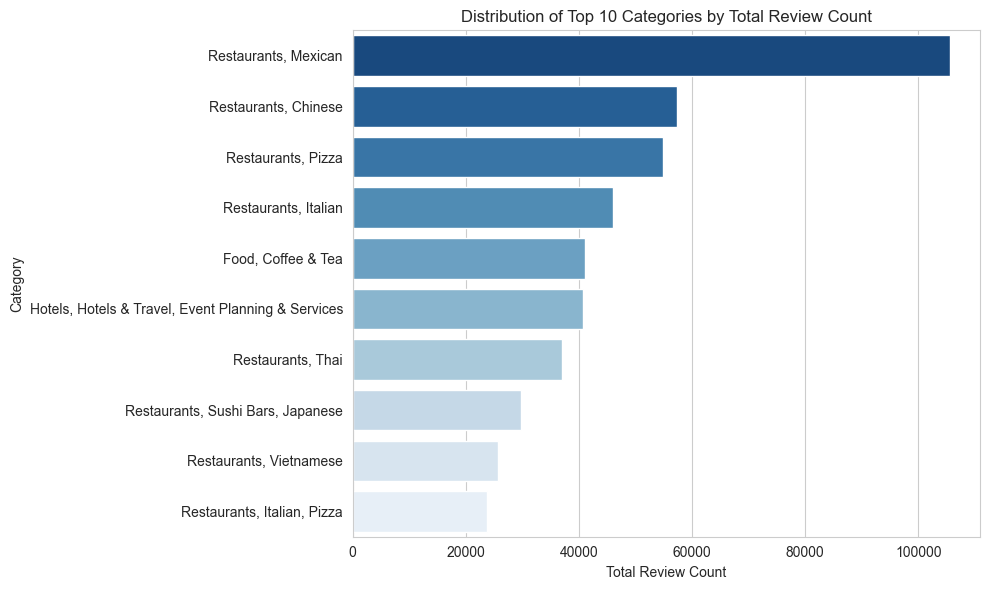

In [16]:
#Distribution of Top 10 Categories by Total Review Count
# Group businesses by category and calculate the sum of review counts
category_review_counts = business.groupby('categories')['review_count'].sum()

# Filter the top 10 categories with the highest review counts
top_10_categories = category_review_counts.nlargest(10)

# Choose a Seaborn color palette
color_palette = 'Blues_r'  # Example: using the 'Blues_r' palette

# Set Seaborn style
sns.set_style('whitegrid')

# Create a bar plot with the chosen color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette=color_palette)
plt.xlabel('Total Review Count')
plt.ylabel('Category')
plt.title('Distribution of Top 10 Categories by Total Review Count')
plt.tight_layout()
plt.show()


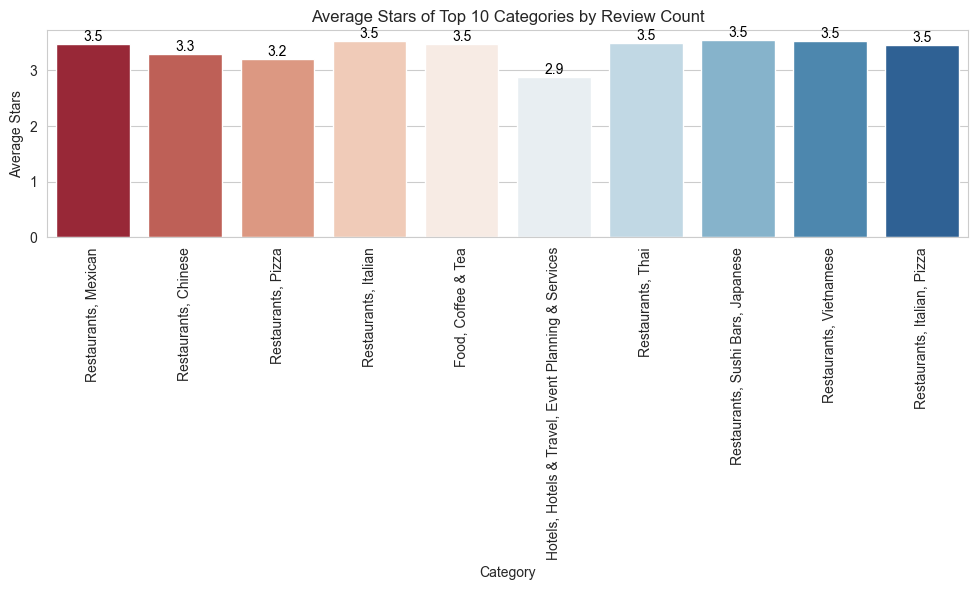

In [17]:
# Group businesses by category and calculate the average stars
category_avg_stars = business.groupby('categories')['stars'].mean()

# Filter the top 10 categories with the highest review counts
top_10_categories = category_review_counts.nlargest(10)

# Sort the categories based on total review count
top_10_categories = top_10_categories.sort_values(ascending=False)

# Get the average stars for the top 10 categories
top_10_avg_stars = category_avg_stars.loc[top_10_categories.index]

# Choose a Seaborn color palette
color_palette = 'RdBu'  # Example: using the 'Blues_r' palette

# Set Seaborn style
sns.set_style('whitegrid')

# Create a bar plot with the chosen color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_avg_stars.index, y=top_10_avg_stars, palette=color_palette)
plt.xlabel('Category')
plt.ylabel('Average Stars')
plt.title('Average Stars of Top 10 Categories by Review Count')
plt.xticks(rotation=90)

# Add average stars labels to the bars
for i, v in enumerate(top_10_avg_stars):
    plt.text(i, v, f'{v:.1f}', color='black', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [18]:
#Furthermore, I am only interested in restaurants for my further analysis. So let's remove all other businesses.
# Check if 'Restaurants' is present in the 'categories' column
business["is_restaurant"] = business["categories"].str.contains("Restaurants")

# Filter rows where 'is_restaurant' is True
business = business[business["is_restaurant"] == True]

# Print rows 144 to 147
print(business.iloc[143:147, :])

# Filter 'reviews' DataFrame based on 'business_id' present in 'business'
restaurant_reviews = reviews[reviews["business_id"].isin(business["business_id"])]




                business_id               name                 city  stars  \
440  hXzoNgpkC86K_Jfg_zMHvA             PHO KC             Glendale    4.5   
442  EVC1vn1KQ2uETnTbDWXc5w   Cadillac Jenkins              Toronto    4.5   
445  4B8VnRAstRRshxiUzm9yPw  Maiko Sushi - DDO  Dollard-des-Ormeaux    4.0   
446  8ELlbjnXfZAw4KbQRP3-EQ     Tomate Basilic  Pointe-Aux-Trembles    4.0   

     review_count                                  categories is_restaurant  
440            96                     Restaurants, Vietnamese          True  
442            13  Caribbean, Tapas/Small Plates, Restaurants          True  
445            51           Restaurants, Sushi Bars, Japanese          True  
446             8                        Restaurants, Italian          True  


#### Exploratory Data Analysis

In [21]:
#average number of reviews per business

np.mean(business['review_count'])

68.45645180306884

C:\Users\admin\AppData\Local\Temp\ipykernel_34652\34762485.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = [base_color if np.isnan(count) else base_color if count == 0 else cm.get_cmap('PuRd')(1 - shading_factor * (1 - value)) for count, value in zip(counts, normalized_counts)]


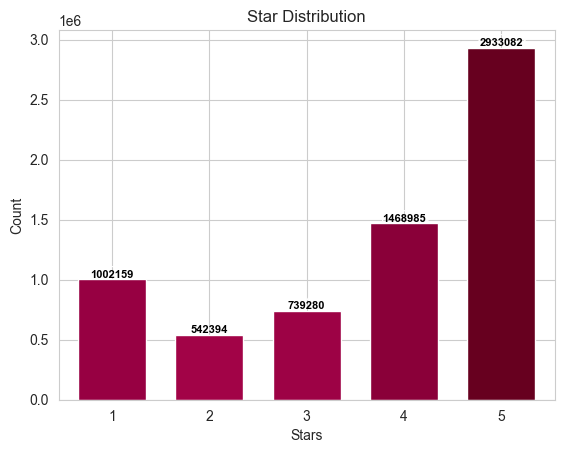

In [22]:
#the distribution of stars

import matplotlib.cm as cm

# Calculate value counts for each star rating
counts = reviews["stars"].value_counts().sort_index()

# Define the base color
base_color = "#8B2252"

# Determine the color shading factor
shading_factor = 0.15

# Normalize the value counts
normalized_counts = (counts - counts.min()) / (counts.max() - counts.min())

# Adjust the shading of the base color based on value counts
colors = [base_color if np.isnan(count) else base_color if count == 0 else cm.get_cmap('PuRd')(1 - shading_factor * (1 - value)) for count, value in zip(counts, normalized_counts)]

# Set the width and padding between the bars
bar_width = 0.7
bar_padding = 0.2

# Create the bar plot with adjusted spacing
plt.bar(counts.index, counts.values, width=bar_width, color=colors, align='center')

# Add count labels to the bars
for x, y in zip(counts.index, counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom', color="white")
    plt.text(x, y, str(y), ha='center', va='bottom', color="black", fontweight="bold", fontsize=8)

# Set the title and labels
plt.title("Star Distribution")
plt.xlabel("Stars")
plt.ylabel("Count")

# Set the tick locations and labels for x-axis
plt.xticks(counts.index)

# Adjust the x-axis limits for proper bar spacing
plt.xlim(counts.index[0] - bar_width/2 - bar_padding, counts.index[-1] + bar_width/2 + bar_padding)

# Show the plot
plt.show()



In [23]:
len(restaurant_reviews)

4201684

#### Text Pre-processing

In [24]:
#Removing non-English reviews
# Concatenate text from restaurant_reviews
text_concatenated = " ".join(restaurant_reviews.iloc[19:29]["text"])

# Detect the language
language = langid.classify(text_concatenated)[0]

# Print the detected language
print(language)



en


In [25]:
#what language are the reviews written in

restaurant_reviews = restaurant_reviews.iloc[:50000, :]
print(len(restaurant_reviews))

# Use langid to detect language
restaurant_reviews["language"] = restaurant_reviews["text"].apply(langid.classify)

# Print the updated DataFrame
print(restaurant_reviews)


50000
                     date  stars  \
4     2018-01-09 20:56:38    5.0   
6     2013-01-20 13:25:59    4.0   
7     2016-05-07 01:21:02    3.0   
8     2010-10-05 19:12:35    1.0   
11    2011-11-30 02:11:15    4.0   
...                   ...    ...   
78512 2018-04-06 00:02:23    5.0   
78513 2017-11-20 09:10:35    4.0   
78514 2014-02-28 01:45:05    3.0   
78517 2017-01-16 20:50:37    1.0   
78518 2015-01-06 17:42:10    5.0   

                                                    text  \
4      Went in for a lunch. Steak sandwich was delici...   
6      I'll be the first to admit that I was not exci...   
7      Tracy dessert had a big name in Hong Kong and ...   
8      This place has gone down hill.  Clearly they h...   
11     Like walking back in time, every Saturday morn...   
...                                                  ...   
78512  I absolutely love kneaders! Their staff is alw...   
78513  800 Degrees Pizza is a "gourmet" version of pl...   
78514  Well... it was

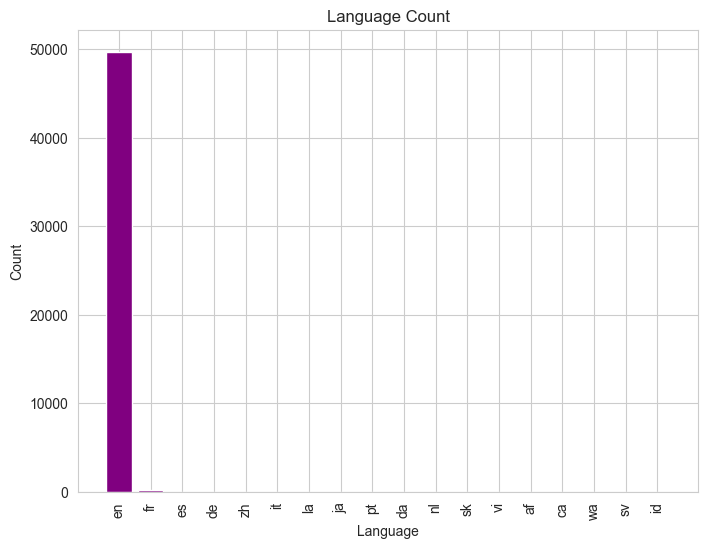

In [26]:
# Remove tuple values
restaurant_reviews['language'] = restaurant_reviews['language'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

# As expected, English is by far the most common. However, Scotish seems to be extremely popular too, which is unexpected. I will inspect the Scotish reviews more closely, but first let's see what a random selection of the other languages look like.
plt.figure(figsize=(8, 6))
plt.bar(restaurant_reviews['language'].value_counts().index, restaurant_reviews['language'].value_counts().values, color='purple')
plt.title('Language Count')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()


In [27]:
#language distribution
restaurant_reviews['language'].value_counts()

language
en    49687
fr      239
es       22
de       14
zh       10
it        7
la        4
ja        4
pt        2
da        2
nl        2
sk        1
vi        1
af        1
ca        1
wa        1
sv        1
id        1
Name: count, dtype: int64

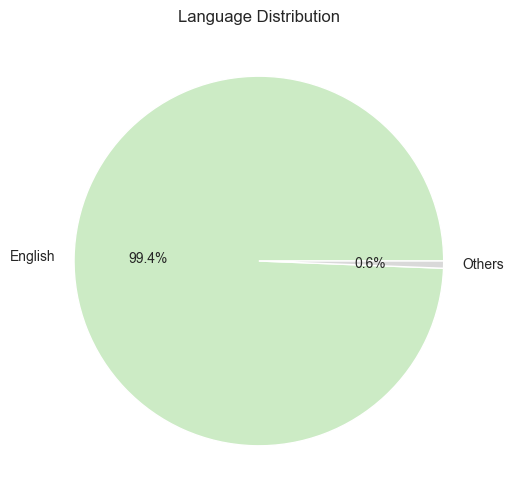

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

language_counts = restaurant_reviews['language'].value_counts()

# Dil değerlerini "en" ve "diğerleri" olarak gruplandırma
language_labels = ['English', 'Others']
language_sizes = [language_counts['en'], language_counts.sum() - language_counts['en']]

# Renk paletini belirleme
color_palette = sns.color_palette('Set3_r')

# Pie chart'ı oluşturma
plt.figure(figsize=(8, 6))
plt.pie(language_sizes, labels=language_labels, autopct='%1.1f%%', colors=color_palette)
plt.title('Language Distribution')
plt.show()



In [29]:
#detecting other languages
foreignText = restaurant_reviews[(restaurant_reviews['language'] != 'en')]
foreignText.iloc[0:22, :].to_clipboard()


In [30]:
#I will remove anything other than english.
restaurant_reviews = restaurant_reviews[(restaurant_reviews['language'] == 'en') ]


Creating output variable (Sentiment) from Star Rating

In [31]:
'''It would make sense to associate 4- and 5-star reviews with a positive sentiment and 1- and 2-star reviews with a negative sentiment.
3-star reviews would be neutral, but for simplicity purposes, we will only attempt to predict the positive and negative sentiment,
and we will revisit neutral later. This is because our goal is to train a model to recognize positive or negative language, and 3-star reviews are likely to contain both.
In normal language, neutral sentiment would mean that we are not using any words with an associated emotion, whereas this is not the case for reviews.
Rather, customers assigning 3-star ratings are likely to have enjoyed some aspects and not enjoyed others. For this reason, I believe including a
''neutral' category is likely to affect our model accuracy and I would rather discard it for now.'''

restaurant_reviews = restaurant_reviews[restaurant_reviews['stars'] != 3]


In [32]:
#Let's now create a binary variable for the sentiment:
# Convert the 'stars' column to a categorical variable (factor) based on a condition
restaurant_reviews['positive'] = restaurant_reviews['stars'] > 3

# Convert the 'positive' column to a categorical variable (factor)
restaurant_reviews['positive'] = restaurant_reviews['positive'].astype('category')

# Get the counts of each category in the 'positive' column
positive_counts = restaurant_reviews['positive'].value_counts()

print(positive_counts)

positive
True     32796
False    10305
Name: count, dtype: int64


In [33]:
restaurant_reviews

,date,stars,text,business_id,language,positive
4,2018-01-09 20:56:38,5.0,Went in for a lunch. Steak sandwich was delici...,ikCg8xy5JIg_NGPx-MSIDA,en,True
6,2013-01-20 13:25:59,4.0,I'll be the first to admit that I was not exci...,eU_713ec6fTGNO4BegRaww,en,True
8,2010-10-05 19:12:35,1.0,This place has gone down hill. Clearly they h...,zvO-PJCpNk4fgAVUnExYAA,en,False
11,2011-11-30 02:11:15,4.0,"Like walking back in time, every Saturday morn...",8mIrX_LrOnAqWsB5JrOojQ,en,True
12,2017-12-15 23:27:08,1.0,"Walked in around 4 on a Friday afternoon, we s...",mRUVMJkUGxrByzMQ2MuOpA,en,False
...,...,...,...,...,...,...
78510,2016-06-01 01:37:24,5.0,"Fantastic atmosphere, great service, awesome s...",8zN3nV0zbtE377_XhlvabA,en,True
78512,2018-04-06 00:02:23,5.0,I absolutely love kneaders! Their staff is alw...,ZRHSidI7IIeXhTHMc9L_gw,en,True
78513,2017-11-20 09:10:35,4.0,"800 Degrees Pizza is a ""gourmet"" version of pl...",hgQOESYp7CF4LnNI90XEiw,en,True
78517,2017-01-16 20:50:37,1.0,If you like RUDE service and leftover food. Yo...,DVfCbJhJUDWRlUfrKzaKOA,en,False


### SENTIMENT MODELS

### Analysis of One Restaurant

In [34]:
#Restaurant Selection
#Let's now have a look at the most popular businesses
business['review_count'] = business['review_count'].astype(float)
summary = business['review_count'].describe()
print(summary)
summary.to_clipboard()


count    59371.000000
mean        68.456452
std        176.636132
min          3.000000
25%          7.000000
50%         21.000000
75%         62.000000
max       8348.000000
Name: review_count, dtype: float64


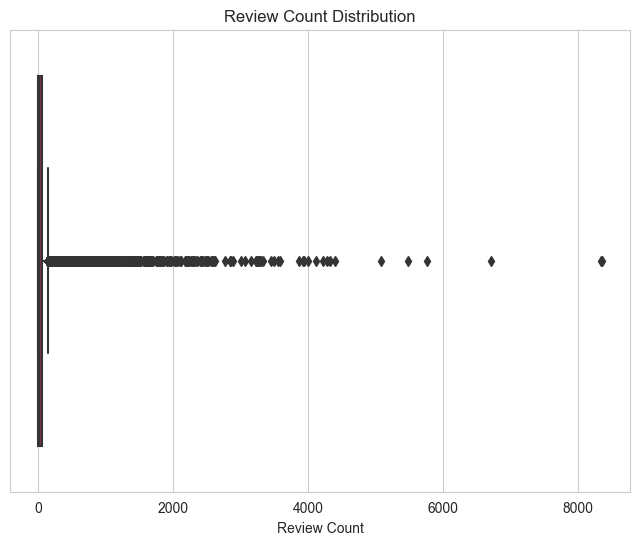

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot of the review_count column
plt.figure(figsize=(8, 6))
sns.boxplot(x=business['review_count'], color='#8B2252')
plt.title('Review Count Distribution')
plt.xlabel('Review Count')
plt.show()


In [36]:
# Define the bins for the review_count ranges
bins = [0, 10, 20, 30, 40, 50, 100, 200, 500, 1000, 10000]

# Create a new column 'review_count_range' to store the bin labels
business['review_count_range'] = pd.cut(business['review_count'], bins)

# Group the data by review_count_range and calculate the count and mean
grouped = business.groupby('review_count_range').agg({'review_count': ['count', 'mean']})

# Rename the columns
grouped.columns = ['Business Count', 'Average Review Count']

# Reset the index
grouped = grouped.reset_index()

# Print the grouped data
print(grouped)
grouped.to_clipboard()


  review_count_range  Business Count  Average Review Count
0            (0, 10]           19741              5.632339
1           (10, 20]            9824             14.972109
2           (20, 30]            5735             25.233827
3           (30, 40]            3771             35.167330
4           (40, 50]            2890             45.303806
5          (50, 100]            7655             71.291313
6         (100, 200]            5233            140.405312
7         (200, 500]            3424            306.349007
8        (500, 1000]             793            677.321564
9      (1000, 10000]             305           1741.845902


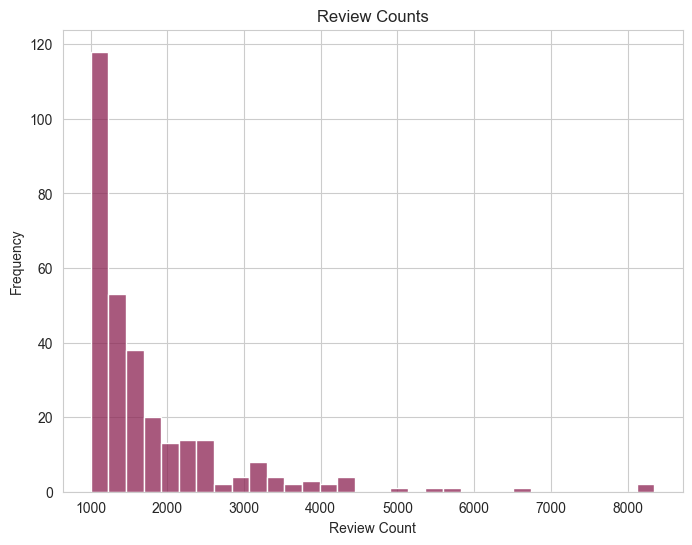

In [37]:
#restaurant counts with over 1000 reviews

business_subset = business[business['review_count'] > 1000]

plt.figure(figsize=(8, 6))
sns.histplot(data=business_subset, x='review_count', color='#8B2252')
plt.title('Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.show()

In [38]:
business_top = business[business['review_count'] > 5000]
business_top = business_top.sort_values(by='review_count', ascending=False)
business_top

,business_id,name,city,stars,review_count,categories,is_restaurant,review_count_range
82251,4JNXUYY8wbaaDmk3BPzlWw,Mon Ami Gabi,Las Vegas,4.0,8348.0,"Food, French, Restaurants, Breakfast & Brunch,...",True,"(1000, 10000]"
89207,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,Las Vegas,4.0,8339.0,"Restaurants, Buffets, Sandwiches, Food, Breakf...",True,"(1000, 10000]"
35200,K7lWdNUhCbcnEvI0NhGewg,Wicked Spoon,Las Vegas,3.5,6708.0,"Buffets, Restaurants, Breakfast & Brunch",True,"(1000, 10000]"
58853,f4x1YBxkLrZg652xt2KR5g,Hash House A Go Go,Las Vegas,4.0,5763.0,"Breakfast & Brunch, Food, Restaurants, America...",True,"(1000, 10000]"
141821,cYwJA2A6I12KNkm2rtXd5g,Gordon Ramsay BurGR,Las Vegas,4.0,5484.0,"Restaurants, Burgers, American (Traditional)",True,"(1000, 10000]"
83951,DkYS3arLOhA8si5uUEmHOw,Earl of Sandwich,Las Vegas,4.5,5075.0,"Food Delivery Services, Salad, Sandwiches, Sou...",True,"(1000, 10000]"


In [39]:
business_top.to_clipboard()

In [40]:
#Before looking at sentiment, I want to inspect one business and plot the ratings over time. I will start by subsetting the dataset and sorting by date.

# Assuming 'reviews' is a DataFrame containing the reviews data
one_business = reviews[reviews['business_id'] == 'iSRTaT9WngzB8JJ2YKJUig'].copy()
one_business_copy = one_business.copy()
one_business = one_business_copy.sort_values(by='date')
one_business_copy = None  # To release the memory used by one_business_copy


In [41]:
len(one_business)

0

In [42]:
# Get the summary statistics for the 'stars' column
summary_stats = one_business['stars'].describe()

# Print the summary statistics
print(summary_stats)

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: stars, dtype: float64


IndexError: index 0 is out of bounds for axis 0 with size 0

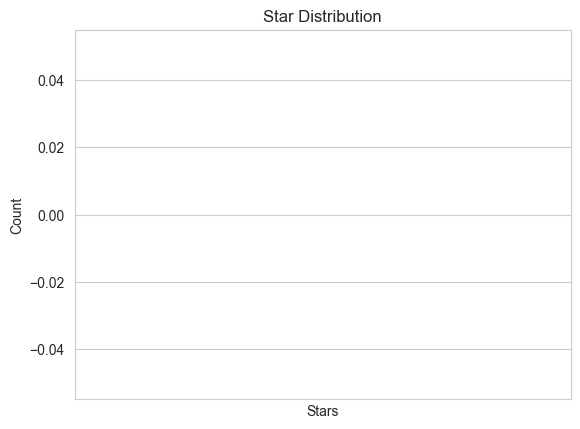

In [43]:
#the distribution of stars

import matplotlib.cm as cm

# Calculate value counts for each star rating
counts = one_business["stars"].value_counts().sort_index()

# Define the base color
base_color = "#8B2252"

# Determine the color shading factor
shading_factor = 0.15

# Normalize the value counts
normalized_counts = (counts - counts.min()) / (counts.max() - counts.min())

# Adjust the shading of the base color based on value counts
colors = [base_color if np.isnan(count) else base_color if count == 0 else cm.get_cmap('PuRd')(1 - shading_factor * (1 - value)) for count, value in zip(counts, normalized_counts)]

# Set the width and padding between the bars
bar_width = 0.7
bar_padding = 0.2

# Create the bar plot with adjusted spacing
plt.bar(counts.index, counts.values, width=bar_width, color=colors, align='center')

# Add count labels to the bars
for x, y in zip(counts.index, counts.values):
    plt.text(x, y, str(y), ha='center', va='bottom', color="white")
    plt.text(x, y, str(y), ha='center', va='bottom', color="black", fontweight="bold", fontsize=8)

# Set the title and labels
plt.title("Star Distribution")
plt.xlabel("Stars")
plt.ylabel("Count")

# Set the tick locations and labels for x-axis
plt.xticks(counts.index)

# Adjust the x-axis limits for proper bar spacing
plt.xlim(counts.index[0] - bar_width/2 - bar_padding, counts.index[-1] + bar_width/2 + bar_padding)

# Show the plot
plt.show()

In [ ]:
'''
# Use langid to detect language
one_business["language"] = one_business["text"].apply(langid.classify)

# Print the updated DataFrame
print(one_business)
'''


In [ ]:
'''
# Remove tuple values
one_business['language'] = one_business['language'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

# As expected, English is by far the most common. However, Scotish seems to be extremely popular too, which is unexpected. I will inspect the Scotish reviews more closely, but first let's see what a random selection of the other languages look like.
plt.figure(figsize=(8, 6))
plt.bar(one_business['language'].value_counts().index, one_business['language'].value_counts().values, color='purple')
plt.title('Language Count')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()
'''


In [ ]:
'''
#language distribution
one_business['language'].value_counts()
'''

In [ ]:
'''
#detecting other languages
foreignText = one_business[(one_business['language'] != 'en')]
foreignText.iloc[0:22, :].to_clipboard()
'''


In [ ]:
'''
#I will remove anything other than english.
one_business = one_business[(one_business['language'] == 'en') ]
'''


In [ ]:
one_business

,date,stars,text,business_id
4734097,2005-05-15 00:10:31,4.0,"Pricey and packed, but well worth the wait. Th...",iSRTaT9WngzB8JJ2YKJUig
4745167,2005-07-10 07:38:55,3.0,"Expensive but quality, Mother's has the third ...",iSRTaT9WngzB8JJ2YKJUig
4752745,2005-08-19 19:34:57,5.0,Mother's was started more than six decades as ...,iSRTaT9WngzB8JJ2YKJUig
4738690,2005-11-30 02:19:50,4.0,"A New Orleans institution, Mother's is thankfu...",iSRTaT9WngzB8JJ2YKJUig
4792078,2005-12-28 09:18:18,5.0,"Yummy, yummy! Try the roast beef po' boy with...",iSRTaT9WngzB8JJ2YKJUig
...,...,...,...,...
4849338,2022-01-12 09:32:21,5.0,Mother's is a New Orleans staple open since th...,iSRTaT9WngzB8JJ2YKJUig
4850126,2022-01-13 00:30:01,4.0,I come here every trip to New Orleans sometime...,iSRTaT9WngzB8JJ2YKJUig
4871149,2022-01-13 04:11:51,4.0,"If you want a breakfast full of eggs, buttermi...",iSRTaT9WngzB8JJ2YKJUig
4870953,2022-01-13 04:44:17,4.0,We walked in just before closing and still rec...,iSRTaT9WngzB8JJ2YKJUig


In [ ]:
# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stop words list
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ezgit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

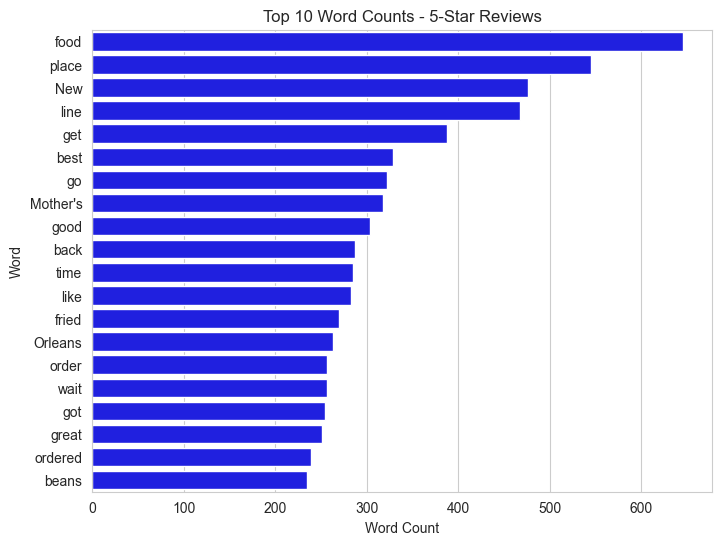

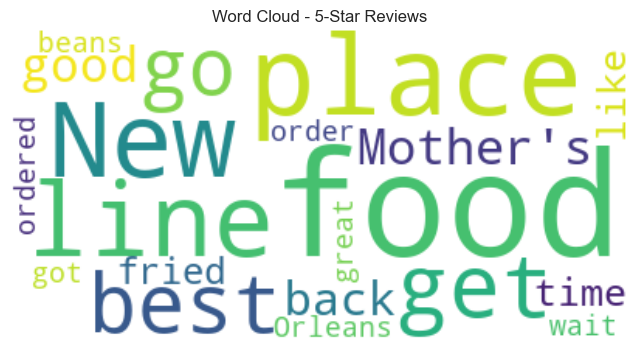

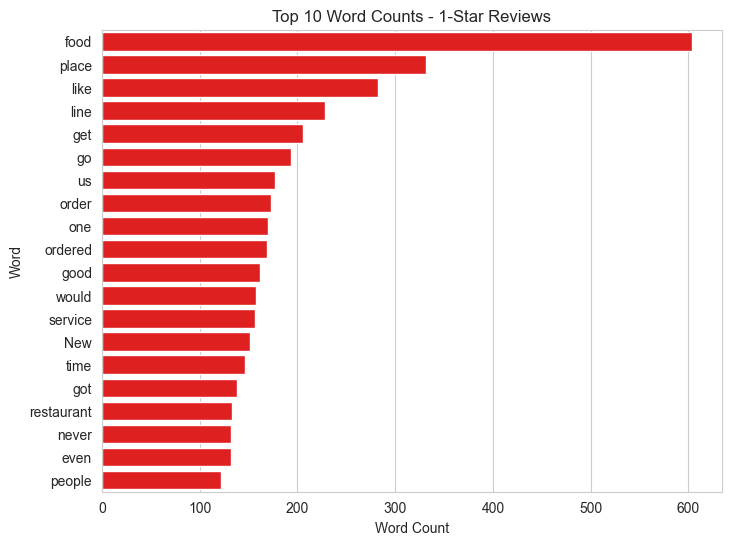

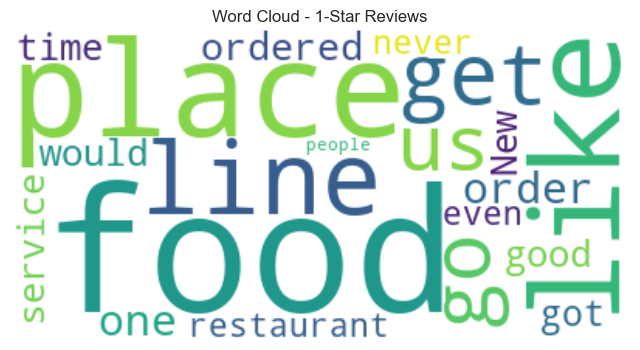

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Filter reviews by business_id
filtered_reviews = one_business

# Separate 5-star and 1-star reviews
five_star_reviews = filtered_reviews[filtered_reviews['stars'] == 5]
one_star_reviews = filtered_reviews[filtered_reviews['stars'] == 1]

# Concatenate text data for 5-star reviews
wordcloud_data_5star = five_star_reviews['text'].str.cat(sep=' ')

# Tokenize and filter stopwords for 5-star reviews
tokens_5star = wordcloud_data_5star.split()
filtered_tokens_5star = [word for word in tokens_5star if word.lower() not in stop_words and word.lower()]

# Count word occurrences for 5-star reviews
word_counts_5star = {}
for word in filtered_tokens_5star:
    if word in word_counts_5star:
        word_counts_5star[word] += 1
    else:
        word_counts_5star[word] = 1

# Sort by count and take top 10 for 5-star reviews
sorted_word_counts_5star = sorted(word_counts_5star.items(), key=lambda x: x[1], reverse=True)[:20]

# Check if there are words and counts available for 5-star reviews
if sorted_word_counts_5star:
    # Create bar plot for 5-star reviews
    words_5star = [word for word, count in sorted_word_counts_5star]
    counts_5star = [count for word, count in sorted_word_counts_5star]

    plt.figure(figsize=(8, 6))
    sns.barplot(x=counts_5star, y=words_5star, color='blue')
    plt.xlabel('Word Count')
    plt.ylabel('Word')
    plt.title('Top 10 Word Counts - 5-Star Reviews')
    plt.show()
else:
    print("No word counts available to plot for 5-star reviews.")

# Create word cloud for 5-star reviews
wordcloud_5star = WordCloud(background_color='white', max_words=20).generate_from_frequencies(word_counts_5star)

# Plot the word cloud for 5-star reviews
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_5star, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - 5-Star Reviews')
plt.show()

# Concatenate text data for 1-star reviews
wordcloud_data_1star = one_star_reviews['text'].str.cat(sep=' ')

# Tokenize and filter stopwords for 1-star reviews
tokens_1star = wordcloud_data_1star.split()
filtered_tokens_1star = [word for word in tokens_1star if word.lower() not in stop_words and word.lower()]

# Count word occurrences for 1-star reviews
word_counts_1star = {}
for word in filtered_tokens_1star:
    if word in word_counts_1star:
        word_counts_1star[word] += 1
    else:
        word_counts_1star[word] = 1

# Sort by count and take top 10 for 1-star reviews
sorted_word_counts_1star = sorted(word_counts_1star.items(), key=lambda x: x[1], reverse=True)[:20]

# Check if there are words and counts available for 1-star reviews
if sorted_word_counts_1star:
    # Create bar plot for 1-star reviews
    words_1star = [word for word, count in sorted_word_counts_1star]
    counts_1star = [count for word, count in sorted_word_counts_1star]

    plt.figure(figsize=(8, 6))
    sns.barplot(x=counts_1star, y=words_1star, color='red')
    plt.xlabel('Word Count')
    plt.ylabel('Word')
    plt.title('Top 10 Word Counts - 1-Star Reviews')
    plt.show()
else:
    print("No word counts available to plot for 1-star reviews.")

# Create word cloud for 1-star reviews
wordcloud_1star = WordCloud(background_color='white', max_words=20).generate_from_frequencies(word_counts_1star)

# Plot the word cloud for 1-star reviews
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_1star, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - 1-Star Reviews')
plt.show()


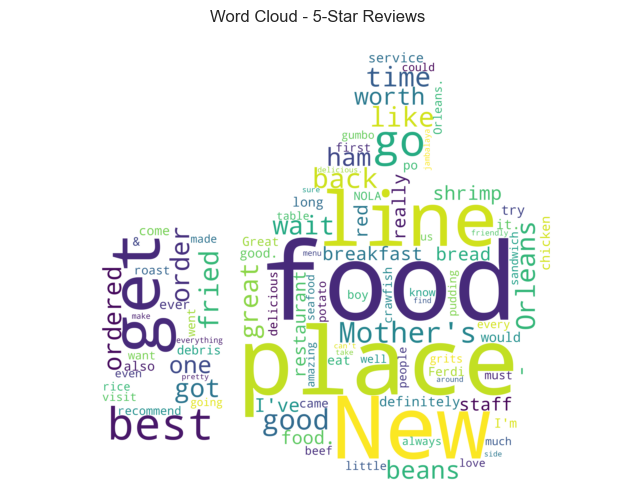

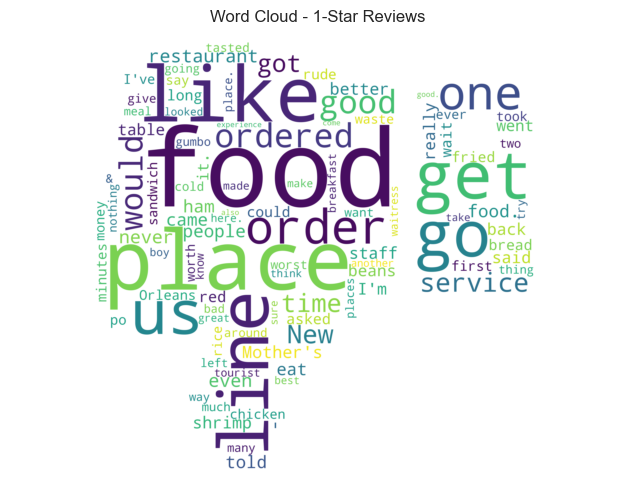

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
import numpy as np
from PIL import Image

# Filter reviews by business_id
filtered_reviews = one_business

# Separate 5-star and 1-star reviews
five_star_reviews = filtered_reviews[filtered_reviews['stars'] == 5]
one_star_reviews = filtered_reviews[filtered_reviews['stars'] == 1]

# Concatenate text data for 5-star reviews
wordcloud_data_5star = five_star_reviews['text'].str.cat(sep=' ')

# Tokenize and filter stopwords for 5-star reviews
tokens_5star = wordcloud_data_5star.split()
stop_words = set(stopwords.words('english'))
filtered_tokens_5star = [word for word in tokens_5star if word.lower() not in stop_words and word.lower()]

# Count word occurrences for 5-star reviews
word_counts_5star = {}
for word in filtered_tokens_5star:
    if word in word_counts_5star:
        word_counts_5star[word] += 1
    else:
        word_counts_5star[word] = 1

# Sort by count and take top 20 for 5-star reviews
sorted_word_counts_5star = sorted(word_counts_5star.items(), key=lambda x: x[1], reverse=True)[:100]

# Check if there are words and counts available for 5-star reviews
if sorted_word_counts_5star:
    # Create WordCloud with thumbs up mask for 5-star reviews
    thumbs_up_img = Image.open(r'C:\yelpdataset\upvote.png')
    thumbs_up_mask = np.array(thumbs_up_img)
    wordcloud_5star = WordCloud(background_color='white', max_words=100, mask=thumbs_up_mask).generate_from_frequencies(dict(sorted_word_counts_5star))

    # Plot the word cloud for 5-star reviews
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud_5star, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud - 5-Star Reviews')
    plt.show()
else:
    print("No word counts available to plot for 5-star reviews.")

# Concatenate text data for 1-star reviews
wordcloud_data_1star = one_star_reviews['text'].str.cat(sep=' ')

# Tokenize and filter stopwords for 1-star reviews
tokens_1star = wordcloud_data_1star.split()
filtered_tokens_1star = [word for word in tokens_1star if word.lower() not in stop_words and word.lower()]

# Count word occurrences for 1-star reviews
word_counts_1star = {}
for word in filtered_tokens_1star:
    if word in word_counts_1star:
        word_counts_1star[word] += 1
    else:
        word_counts_1star[word] = 1

# Sort by count and take top 20 for 1-star reviews
sorted_word_counts_1star = sorted(word_counts_1star.items(), key=lambda x: x[1], reverse=True)[:100]

# Check if there are words and counts available for 1-star reviews
if sorted_word_counts_1star:
    # Create WordCloud with thumbs down mask for 1-star reviews
    thumbs_down_img = Image.open(r'C:\yelpdataset\downvote.png')
    thumbs_down_mask = np.array(thumbs_down_img)
    wordcloud_1star = WordCloud(background_color='white', max_words=100, mask=thumbs_down_mask).generate_from_frequencies(dict(sorted_word_counts_1star))

    # Plot the word cloud for 1-star reviews
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud_1star, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud - 1-Star Reviews')
    plt.show()
else:
    print("No word counts available to plot for 1-star reviews.")


5 star reviews word combinations

In [ ]:
import itertools
from collections import Counter
from nltk.corpus import stopwords

# Define stop words list
stop_words = set(stopwords.words('english'))

# Select filtered reviews for a specific business_id
filtered_reviews = one_business

# Take only 5-star reviews
five_star_reviews = filtered_reviews[filtered_reviews['stars'] == 5]

# Get the combined text of all 5-star reviews
all_reviews_text = five_star_reviews['text'].str.cat(sep=' ')

# Convert text to lowercase and remove punctuation
all_reviews_text = all_reviews_text.lower()
all_reviews_text = ''.join(c for c in all_reviews_text if c.isalnum() or c.isspace())

# Split words and remove stopwords
words = all_reviews_text.split()
words = [word for word in words if word not in stop_words]

# Create combinations of 2 adjacent words
word_combinations = list(zip(words[:-1], words[1:]))

# Count combinations
word_counts = Counter(word_combinations)

# Select the top 10 most frequent combinations
top_10_combinations = word_counts.most_common(10)

# Print results
for combination, count in top_10_combinations:
    print(combination, count)


('new', 'orleans') 478
('po', 'boy') 240
('red', 'beans') 207
('beans', 'rice') 184
('bread', 'pudding') 177
('fried', 'chicken') 154
('roast', 'beef') 145
('potato', 'salad') 105
('worth', 'wait') 95
('ferdi', 'special') 90
('ive', 'ever') 78
('great', 'food') 69
('baked', 'ham') 68
('go', 'back') 68
('highly', 'recommend') 59
('come', 'back') 58
('po', 'boys') 57
('every', 'time') 56
('famous', 'ferdi') 55
('wait', 'line') 55
('seafood', 'gumbo') 52
('line', 'door') 51
('green', 'beans') 51
('first', 'time') 50
('crawfish', 'etouffee') 49
('turnip', 'greens') 48
('long', 'line') 47
('one', 'best') 46
('food', 'great') 46
('fried', 'shrimp') 44
('shrimp', 'po') 43
('crawfish', 'etoufee') 43
('good', 'food') 43
('next', 'time') 43
('really', 'good') 41
('au', 'jus') 40
('food', 'amazing') 39
('well', 'worth') 39
('crawfish', 'étouffée') 39
('beef', 'debris') 36
('cafeteria', 'style') 36
('shrimp', 'creole') 36
('make', 'sure') 35
('food', 'good') 35
('service', 'great') 35
('pecan', 'p

In [ ]:
import itertools
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stop words list
stop_words = set(stopwords.words('english'))

# Select filtered reviews for a specific business_id
filtered_reviews = one_business

# Take only 5-star reviews
five_star_reviews = filtered_reviews[filtered_reviews['stars'] == 5]

# Get the combined text of all 5-star reviews
all_reviews_text = five_star_reviews['text'].str.cat(sep=' ')

# Convert text to lowercase and remove punctuation
all_reviews_text = all_reviews_text.lower()
all_reviews_text = ''.join(c for c in all_reviews_text if c.isalnum() or c.isspace())

# Split words and remove stopwords
words = all_reviews_text.split()
words = [word for word in words if word not in stop_words]

# Create combinations of 3 adjacent words
word_combinations = list(zip(words[:-2], words[1:-1], words[2:]))

# Count combinations
word_counts = Counter(word_combinations)

# Select the top 200 most frequent combinations
top_200


('red', 'beans', 'rice') 175
('shrimp', 'po', 'boy') 41
('roast', 'beef', 'debris') 31
('famous', 'ferdi', 'special') 30
('ham', 'roast', 'beef') 29
('visit', 'new', 'orleans') 28
('sweet', 'potato', 'pie') 23
('back', 'new', 'orleans') 21
('visiting', 'new', 'orleans') 20
('wait', 'go', 'back') 20
('cant', 'wait', 'go') 19
('oyster', 'po', 'boy') 19
('trip', 'new', 'orleans') 19
('best', 'ive', 'ever') 18
('debris', 'po', 'boy') 17
('well', 'worth', 'wait') 17
('best', 'fried', 'chicken') 17
('best', 'bread', 'pudding') 16
('green', 'beans', 'tomatoes') 16
('roast', 'beef', 'po') 15
('cant', 'go', 'wrong') 15
('po', 'boy', 'delicious') 15
('highly', 'recommend', 'place') 15
('roast', 'beef', 'poboy') 14
('soft', 'shell', 'crab') 14
('next', 'time', 'im') 14
('new', 'orleans', 'food') 14
('definitely', 'come', 'back') 14
('definitely', 'worth', 'wait') 14
('shrimp', 'oyster', 'po') 14
('beef', 'po', 'boy') 13
('best', 'baked', 'ham') 13
('new', 'orleans', 'mothers') 13
('go', 'new', 'o

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ezgit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
import itertools
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stop words list
stop_words = set(stopwords.words('english'))

# Select filtered reviews for a specific business_id
filtered_reviews = one_business

# Take only 5-star reviews
five_star_reviews = filtered_reviews[filtered_reviews['stars'] == 5]

# Get the combined text of all 5-star reviews
all_reviews_text = five_star_reviews['text'].str.cat(sep=' ')

# Convert text to lowercase and remove punctuation
all_reviews_text = all_reviews_text.lower()
all_reviews_text = ''.join(c for c in all_reviews_text if c.isalnum() or c.isspace())

# Split words and remove stopwords
words = all_reviews_text.split()
words = [word for word in words if word not in stop_words]

# Create combinations of 4 adjacent words
word_combinations = list(zip(words[:-3], words[1:-2], words[2:-1], words[3:]))

# Count combinations
word_counts = Counter(word_combinations)

# Select the top 200 most frequent combinations
top_200_combinations = word_counts.most_common(200)

# Print results
for combination, count in top_200_combinations:
    print(combination, count)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1 star reviews word combinations

In [45]:
sorted_word_counts_1star

NameError: name 'sorted_word_counts_1star' is not defined

In [ ]:
import itertools
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stop words list
stop_words = set(stopwords.words('english'))

# Filter reviews for a specific business_id
filtered_reviews = one_business

# Take only 1-star reviews
one_star_reviews = filtered_reviews[filtered_reviews['stars'] == 1]

# Get the combined text of all 1-star reviews
all_reviews_text = one_star_reviews['text'].str.cat(sep=' ')

# Convert text to lowercase and remove punctuation
all_reviews_text = all_reviews_text.lower()
all_reviews_text = ''.join(c for c in all_reviews_text if c.isalnum() or c.isspace())

# Split words and remove stopwords
words = all_reviews_text.split()
words = [word for word in words if word not in stop_words]

# Create combinations of 2 adjacent words
word_combinations = list(zip(words[:-1], words[1:]))

# Count combinations
word_counts = Counter(word_combinations)

# Select the top 200 most frequent combinations
top_200_combinations = word_counts.most_common(200)

# Print results
for combination, count in top_200_combinations:
    print(combination, count)


('new', 'orleans') 146
('po', 'boy') 91
('red', 'beans') 86
('beans', 'rice') 69
('tourist', 'trap') 52
('fried', 'chicken') 50
('tasted', 'like') 45
('roast', 'beef') 44
('waste', 'time') 38
('go', 'back') 37
('customer', 'service') 34
('long', 'line') 31
('bread', 'pudding') 31
('potato', 'salad') 30
('told', 'us') 28
('shrimp', 'po') 26
('30', 'minutes') 25
('first', 'time') 25
('waste', 'money') 24
('dont', 'waste') 24
('po', 'boys') 23
('somewhere', 'else') 23
('never', 'go') 23
('time', 'money') 23
('food', 'good') 22
('wait', 'line') 21
('baked', 'ham') 21
('line', 'order') 20
('nothing', 'special') 20
('ive', 'ever') 20
('food', 'cold') 20
('staff', 'rude') 20
('seafood', 'gumbo') 20
('dont', 'know') 19
('shrimp', 'poboy') 19
('20', 'minutes') 19
('ferdi', 'special') 19
('didnt', 'even') 19
('food', 'bland') 19
('fried', 'shrimp') 18
('order', 'food') 18
('food', 'came') 18
('im', 'sure') 17
('much', 'better') 17
('seafood', 'platter') 17
('go', 'mothers') 17
('would', 'recomme

In [46]:
import itertools
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stop words list
stop_words = set(stopwords.words('english'))

# Filter reviews for a specific business_id
filtered_reviews = one_business

# Take only 1-star reviews
one_star_reviews = filtered_reviews[filtered_reviews['stars'] == 1]

# Get the combined text of all 1-star reviews
all_reviews_text = one_star_reviews['text'].str.cat(sep=' ')

# Convert text to lowercase and remove punctuation
all_reviews_text = all_reviews_text.lower()
all_reviews_text = ''.join(c for c in all_reviews_text if c.isalnum() or c.isspace())

# Split words and remove stopwords
words = all_reviews_text.split()
words = [word for word in words if word not in stop_words]

# Create combinations of 3 adjacent words
word_combinations = list(zip(words[:-2], words[1:-1], words[2:]))

# Count combinations
word_counts = Counter(word_combinations)

# Select the top 200 most frequent combinations
top_200_combinations = word_counts.most_common(200)

# Print results
for combination, count in top_200_combinations:
    print(combination, count)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
import itertools
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stop words list
stop_words = set(stopwords.words('english'))

# Filter reviews for a specific business_id
filtered_reviews = one_business

# Take only 1-star reviews
one_star_reviews = filtered_reviews[filtered_reviews['stars'] == 1]

# Get the combined text of all 1-star reviews
all_reviews_text = one_star_reviews['text'].str.cat(sep=' ')

# Convert text to lowercase and remove punctuation
all_reviews_text = all_reviews_text.lower()
all_reviews_text = ''.join(c for c in all_reviews_text if c.isalnum() or c.isspace())

# Split words and remove stopwords
words = all_reviews_text.split()
words = [word for word in words if word not in stop_words]

# Create combinations of 4 adjacent words
word_combinations = list(zip(words[:-3], words[1:-2], words[2:-1], words[3:]))

# Count combinations
word_counts = Counter(word_combinations)

# Select the top 200 most frequent combinations
top_200_combinations = word_counts.most_common(200)

# Print results
for combination, count in top_200_combinations:
    print(combination, count)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
